In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

In [2]:
# import TwoLayerNN class from the other notebook
import import_ipynb
import OneHiddenLayerNN_class

importing Jupyter notebook from OneHiddenLayerNN_class.ipynb


#### The task : Classify dataset using the network that we build in the "OneHiddenLayerNN_class.ipynb" file

In [3]:
x,y = make_moons(n_samples=400, shuffle=False, noise=.15)

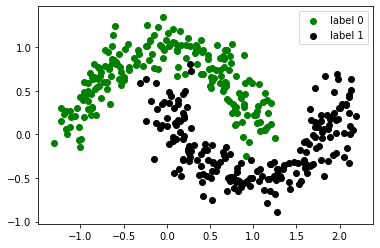

In [4]:
#scatter plot of data
plt.scatter(x[:200,0],x[:200,1], color = 'green')
plt.scatter(x[200:,0],x[200:,1], color = 'black')
plt.legend(('label 0','label 1'))

In [5]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1)

x_trainval, x_val, y_trainval, y_val=train_test_split(x_train,y_train,test_size=0.1)

In [6]:
# hyperparameters tuning

best_score = 0

hidden_neurons = np.arange(3,13,3)
learning_rates = [0.05, 0.1, 0.15, 0.3] 
minibatch_sizes = [50, 100, 200]
iterations = [1000, 5000, 10000, 25000] 

for hidden_neuron in hidden_neurons :
    for learning_rate in learning_rates :
        for minibatch_size in minibatch_sizes :
            for iteration in iterations : 

                # the model
                nn = OneHiddenLayerNN_class.OneHiddenLayerNN(2,hidden_neuron)    
                # train the model
                nn.sgd(x_trainval, y_trainval, learning_rate, minibatch_size,iteration) 
                # accuracy over validation set
                score = accuracy_score(y_val , np.where(nn.forward_pass(x_val)[0] > 1/2, 1, 0)  )

                if score > best_score :
                    best_score = score
                    opt_param = {'hidden_neurons' : hidden_neuron,
                                'learning_rate' : learning_rate,
                                'minibatch_size' : minibatch_size,
                                'iterations' : iteration}


In [7]:
# final model
print('The optimal parameters are ', opt_param)
model = OneHiddenLayerNN_class.OneHiddenLayerNN(2, opt_param['hidden_neurons'])
# training
model.sgd(x_train,y_train,opt_param['learning_rate'],opt_param['minibatch_size'],opt_param['iterations'])
# accuracy over the useen data of the test set
model_score = accuracy_score(y_test , np.where(model.forward_pass(x_test)[0] > 1/2 ,1,0)  )

The optimal parameters are  {'hidden_neurons': 9, 'learning_rate': 0.15, 'minibatch_size': 100, 'iterations': 5000}


In [8]:
model_score

1.0

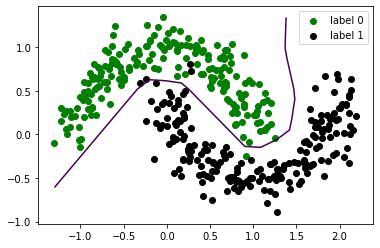

In [9]:
# plotting the classifier

plt.figure()
    
#scatter plot of data
plt.scatter(x[:200,0],x[:200,1], color = 'green')
plt.scatter(x[200:,0],x[200:,1], color = 'black')
plt.legend(('label 0','label 1'))

#contour line of learned classifier
x_min = x[:,0].min()
y_min = x[:,1].min()
x_max = x[:,0].max()
y_max = x[:,1].max()

u = np.linspace(x_min,x_max, 20)
v = np.linspace(y_min,y_max, 20)
xx, yy = np.meshgrid(u,v) 
xx_line = np.resize(xx,(20**2,1))
yy_line = np.resize(yy,(20**2,1))         
t = np.concatenate((xx_line,yy_line), axis = 1)
z_pre=model.forward_pass(t)[0]
z_post = np.resize(z_pre,(20,20))  
plt.contour(xx,yy,z_post, levels = [1/2])